# TP1.2 Ruleta
## Se busca simular apuestas, a traves de distintas estrategias

## Importacion de librerias

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
vi = 0          # valor inicial ruleta
vf = 36         # valor final ruleta

green = [0]
black = []
red = []

for i in range(1,vf +1):
    if i < 11:
        if i % 2 == 0:
            black.append(i)
        if i % 2 != 0:
            red.append(i)
    if i > 10 and i < 19:
        if i % 2 == 0:
            red.append(i)
        if i % 2 != 0:
            black.append(i)
    if i > 18 and i < 29:
        if i % 2 == 0:
            black.append(i)
        if i % 2 != 0:
            red.append(i)
    if i > 28 and i < 37:
        if i % 2 == 0:
            red.append(i)
        if i % 2 != 0:
            black.append(i)

par = []
impar = []

for i in range(1, vf + 1):
    if i % 2 == 0:
        par.append(i)
    else:
        impar.append(i)


half_1 = []
half_2 = []

for i in range(1, vf + 1):
    if i < 19:
        half_1.append(i)
    else:
        half_2.append(i)

third_1 = []
third_2 = []
third_3 = []

for i in range(1, vf + 1):
    if i < 13:
        third_1.append(i)
    elif i > 12 and i < 25:
        third_2.append(i)
    else:
        third_3.append(i)


## Funcion apuesta

In [3]:
def apuesta(val_ap):
    nro_random = np.random.randint(vi, vf +1)
    ap_ganada = False

    if isinstance(val_ap, str) == True:
        if val_ap == 'red':
            for i in red:
                if i == nro_random:
                    ap_ganada = True
  

        if val_ap == 'black':
            for i in black:
                if i == nro_random:
                    ap_ganada = True
       
        if val_ap == 'half_1':
            for i in half_1:
                if i == nro_random:
                    ap_ganada = True

        if val_ap == 'half_2':
            for i in half_2:
                if i == nro_random:
                    ap_ganada = True

        if val_ap == 'third_1':
            for i in third_1:
                if i == nro_random:
                    ap_ganada = True

        if val_ap == 'third_2':
            for i in third_2:
                if i == nro_random:
                    ap_ganada = True

        if val_ap == 'third_3':
            for i in third_3:
                if i == nro_random:
                    ap_ganada = True

        if val_ap == 'par':
            for i in par:
                if i == nro_random:
                    ap_ganada = True

        if val_ap == 'impar':
            for i in impar:
                if i == nro_random:
                    ap_ganada = True
   

    if isinstance(val_ap, int) == True:
        if val_ap == nro_random:
            ap_ganada = True

    return ap_ganada

## Experimento Martingala

### Capital limitado

#### Plot

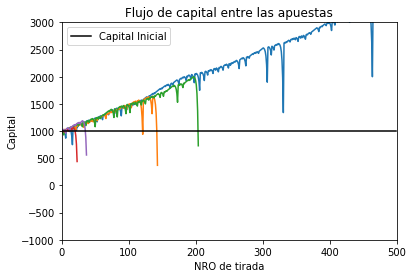

In [240]:
tm = 500           # tiradas maximas
ex = 5             #nro de experimentos
ap_min = 10         # apuesta minima
cap_in = 1000        # capital inicial
val_ap = 'black'      # apuesta a realizar
arr_cap_in = []     # arreglo capital inicial
       

for i in range(ex):
    arr_cap = [cap_in]
    cap = cap_in # capital actual
    din_apues = ap_min

    for i in range(1, tm + 1):
        if cap >= din_apues:
            ap_ganada = apuesta(val_ap)
            if ap_ganada == False:
                cap -= din_apues
                din_apues = din_apues * 2
            else:
                if isinstance(val_ap, str) == True:
                    if val_ap == "third_1" or val_ap == "third_2" or val_ap == "third_3":
                        cap += 2 * din_apues
                    else:
                        cap += din_apues
                if isinstance(val_ap, int) == True:
                    cap += 35 * din_apues  
                din_apues = ap_min
            arr_cap.append(cap)        
        else:
            break   
    plt.plot(arr_cap) 

for i in range(1, tm + 1):
    arr_cap_in.append(cap_in)
plt.plot(arr_cap_in, color= "black", label= "Capital Inicial")


plt.title("Flujo de capital entre las apuestas")
plt.axis([0, tm, cap_in - 2000, cap_in + 2000])
plt.xlabel("NRO de tirada")
plt.ylabel("Capital")
plt.legend(loc= "left")
plt.show()

#### Hist

[0.0, 0.5, 0.3333333333333333, 0.25, 0.4, 0.3333333333333333, 0.42857142857142855, 0.375, 0.4444444444444444, 0.4, 0.36363636363636365, 0.3333333333333333, 0.38461538461538464, 0.35714285714285715, 0.4, 0.4375, 0.4117647058823529, 0.3888888888888889, 0.3684210526315789, 0.4]


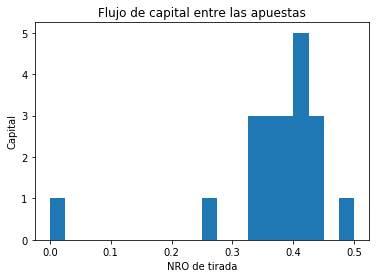

In [187]:
tm = 20            # tiradas maximas
ex = 1             #nro de experimentos
din_apues = 100     # $ apuesta a realizar
ap_min = 10         # apuesta minima
cap_in = 5000         # capital inicial
val_ap = 'impar'      # apuesta a realizar
arr_cap_in = []     # arreglo capital inicial
       

for i in range(ex):
    countx = 0
    countt = 0
    arr_frec = []
    for i in range(1, tm + 1):
        if cap >= din_apues:
            ap_ganada = apuesta(val_ap)
            countt += 1

            if ap_ganada == True:
                countx += 1
            arr_frec.append(countx/countt)   
        else:
            break   
    print(arr_frec)
    plt.hist(arr_frec, bins= tm) 



plt.title("Flujo de capital entre las apuestas")
plt.xlabel("NRO de tirada")
plt.ylabel("Capital")
plt.show()

### Capital Ilimitado

#### Plot

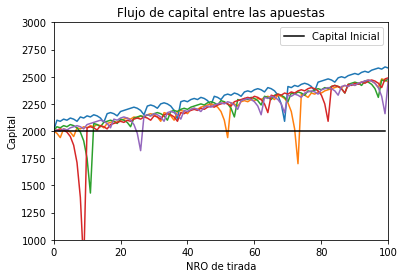

In [239]:
tm = 100            # tiradas maximas
ex = 5             #nro de experimentos
din_apues = 100     # $ apuesta a realizar
ap_min = 10         # apuesta minima
cap_in = 2000         # capital inicial
val_ap = 'impar'      # apuesta a realizar
arr_cap_in = []     # arreglo capital inicial


       

for i in range(ex):
    arr_cap = [cap_in]
    cap = cap_in # capital actual
    for i in range(1, tm + 1):
        ap_ganada = apuesta(val_ap)
        if ap_ganada == False:
            cap -= din_apues
            din_apues = din_apues * 2
        else:
            if isinstance(val_ap, str) == True:
                if val_ap == "third_1" or val_ap == "third_2" or val_ap == "third_3":
                    cap += 2 * din_apues
                else:
                    cap += din_apues
            if isinstance(val_ap, int) == True:
                cap += 35 * din_apues  
            din_apues = ap_min
        arr_cap.append(cap)          
    plt.plot(arr_cap)
    

for i in range(1, tm + 1):
    arr_cap_in.append(cap_in)
plt.plot(arr_cap_in, color= "black", label= "Capital Inicial")


plt.title("Flujo de capital entre las apuestas")
plt.axis([0, tm, cap_in - 1000, cap_in + 1000])
plt.xlabel("NRO de tirada")
plt.ylabel("Capital")
plt.legend(loc= "left")
plt.show()

#### Hist

## Experimento D'alembert

### Capital limitado

#### Plot

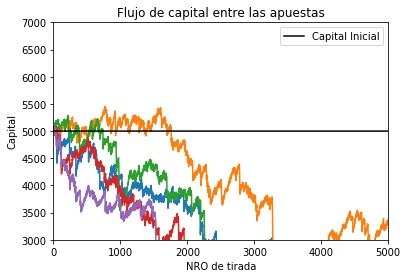

In [19]:
tm = 5000           # tiradas maximas
ex = 5             #nro de experimentos
ap_min = 10         # apuesta minima
cap_in = 5000       # capital inicial
val_ap = 'black'      # apuesta a realizar
arr_cap_in = []     # arreglo capital inicial
       

for i in range(ex):
    arr_cap = [cap_in]
    cap = cap_in # capital actual
    din_apues = ap_min

    for i in range(1, tm + 1):
        if cap >= din_apues:
            ap_ganada = apuesta(val_ap)
            if ap_ganada == False:
                cap -= din_apues
                din_apues = din_apues + ap_min
            else:
                if isinstance(val_ap, str) == True:
                    if val_ap == "third_1" or val_ap == "third_2" or val_ap == "third_3":
                        cap += 2 * din_apues
                    else:
                        cap += din_apues
                if isinstance(val_ap, int) == True:
                    cap += 35 * din_apues  
                din_apues = ap_min
            arr_cap.append(cap)        
        else:
            break   
    plt.plot(arr_cap) 

for i in range(1, tm + 1):
    arr_cap_in.append(cap_in)
plt.plot(arr_cap_in, color= "black", label= "Capital Inicial")


plt.title("Flujo de capital entre las apuestas")
plt.axis([0, tm, cap_in - 2000, cap_in + 2000])
plt.xlabel("NRO de tirada")
plt.ylabel("Capital")
plt.legend(loc= "left")
plt.show()

#### Hist

### Capital ilimitado

#### Plot

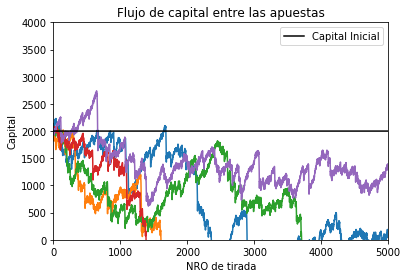

In [14]:
tm = 5000            # tiradas maximas
ex = 5             #nro de experimentos
din_apues = 100     # $ apuesta a realizar
ap_min = 10         # apuesta minima
cap_in = 2000         # capital inicial
val_ap = 'impar'      # apuesta a realizar
arr_cap_in = []     # arreglo capital inicial


       

for i in range(ex):
    arr_cap = [cap_in]
    cap = cap_in # capital actual
    for i in range(1, tm + 1):
        ap_ganada = apuesta(val_ap)
        if ap_ganada == False:
            cap -= din_apues
            din_apues = din_apues + ap_min
        else:
            if isinstance(val_ap, str) == True:
                if val_ap == "third_1" or val_ap == "third_2" or val_ap == "third_3":
                    cap += 2 * din_apues
                else:
                    cap += din_apues
            if isinstance(val_ap, int) == True:
                cap += 35 * din_apues  
            din_apues = ap_min
        arr_cap.append(cap)          
    plt.plot(arr_cap)
    

for i in range(1, tm + 1):
    arr_cap_in.append(cap_in)
plt.plot(arr_cap_in, color= "black", label= "Capital Inicial")


plt.title("Flujo de capital entre las apuestas")
plt.axis([0, tm, cap_in - 2000, cap_in + 2000])
plt.xlabel("NRO de tirada")
plt.ylabel("Capital")
plt.legend(loc= "left")
plt.show()

#### Hist

## Experimento de Proporcion Constante

### Capital limitado

#### Plot

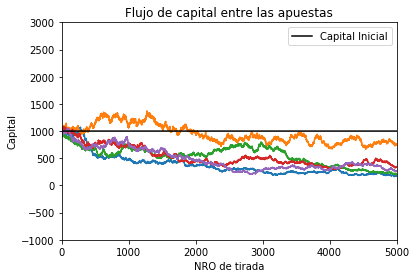

In [38]:
tm = 5000           # tiradas maximas
ex = 5             #nro de experimentos
ap_min = 10         # apuesta minima
cap_in = 1000        # capital inicial
val_ap = 'black'      # apuesta a realizar
arr_cap_in = []     # arreglo capital inicial
       

for i in range(ex):
    arr_cap = [cap_in]
    cap = cap_in # capital actual
    din_apues = ap_min

    for i in range(1, tm + 1):
        din_apues = 0.01 * cap      # se apuesta un 1% del capital
        if cap >= din_apues:
            ap_ganada = apuesta(val_ap)
            if ap_ganada == False:
                cap -= din_apues
            else:
                if isinstance(val_ap, str) == True:
                    if val_ap == "third_1" or val_ap == "third_2" or val_ap == "third_3":
                        cap += 2 * din_apues
                    else:
                        cap += din_apues
                if isinstance(val_ap, int) == True:
                    cap += 35 * din_apues  
            arr_cap.append(cap)        
        else:
            break   
    plt.plot(arr_cap) 

for i in range(1, tm + 1):
    arr_cap_in.append(cap_in)
plt.plot(arr_cap_in, color= "black", label= "Capital Inicial")


plt.title("Flujo de capital entre las apuestas")
plt.axis([0, tm, cap_in - 2000, cap_in + 2000])
plt.xlabel("NRO de tirada")
plt.ylabel("Capital")
plt.legend(loc= "left")
plt.show()

#### Hist